In [57]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import string
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.corpus import stopwords


# Loading and Reading Data

In [2]:
# function that extracts labels and tweets from a txt file such that:
# first word in line is the label and the rest is the tweet text
def read_data(filename):
    data = pd.read_csv(filename)
    data['labels'] = data['tweets'].str.split(expand=True)[0]
    data['tweets'] = [x.split(maxsplit=1)[1] for x in data['tweets']]
    
    return data

In [3]:
data = read_data("/Users/rahulmalhotra/Desktop/Statistical Software/Final Project/all_tweets.csv")

In [4]:
# get the tweets and labels into two separate numpy arrays
all_tweets = data['tweets'].to_numpy()
all_labels = data['labels'].to_numpy()

In [6]:
# splitting data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(all_tweets, all_labels, test_size = 0.2, random_state = 1)

In [7]:
# splitting training set into a smaller training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

# Logistic Regression

In [10]:
# pipelines set up a sequence of transformations to be applied one after another on the data
# here the tf-idf transformation is followed by Logistic regression
model_logistic = make_pipeline(TfidfVectorizer(), LogisticRegression(verbose=1, solver='newton-cg', multi_class ='auto', random_state=0, C=1, penalty='l2',max_iter=1000))
# fit the model using the training data and then predict the targets/labels of test data
model_logistic.fit(x_train, y_train)
predicted_labels_logistic = model_logistic.predict(x_val)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished


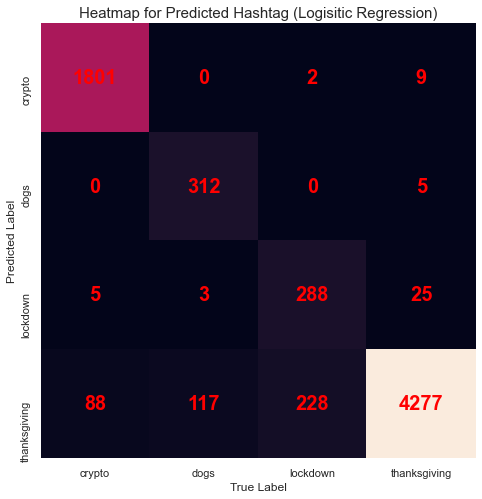

In [11]:
#Confusion Matrix for the Validation set prediction
mat_logistic = confusion_matrix(y_val, predicted_labels_logistic)
plt.figure(figsize=(8,8))
sns.heatmap(mat_logistic.T, square=True, annot=True, annot_kws={"size": 20, "color": "red", "weight": "bold"}, fmt='d', cbar=False,
           xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Heatmap for Predicted Hashtag (Logisitic Regression)", fontdict={"fontsize":15});

In [12]:
f1_micro_logistic = f1_score(y_val, predicted_labels_logistic, average='micro')
f1_macro_logistic = f1_score(y_val, predicted_labels_logistic, average='macro')

print('Validation Set Micro F1 score: ', f1_micro_logistic)
print('Validation Set Macro F1 score: ', f1_macro_logistic)

Validation Set Micro F1 score:  0.9326815642458101
Validation Set Macro F1 score:  0.8598216059392844


# Naive Bayes

In [13]:
# pipelines set up a sequence of transformations to be applied one after another on the data
# here the tf-idf transformation is followed by Multinomial Naive Bayes
model_naive = make_pipeline(TfidfVectorizer(), MultinomialNB())
# fit the model using the training data and then predict the targets/labels of test data
model_naive.fit(x_train, y_train)
predicted_labels_naive = model_naive.predict(x_val)


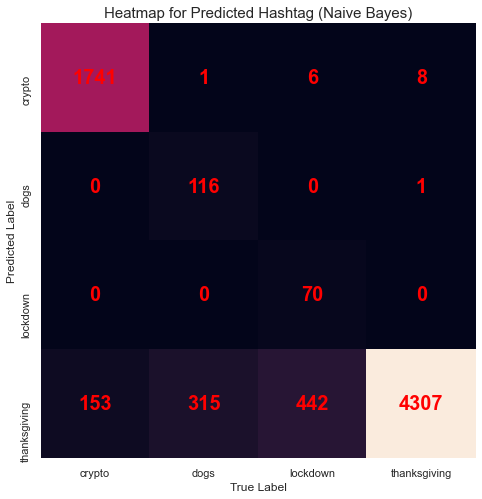

In [14]:
#Confusion Matrix for the Validation set prediction
mat_naive = confusion_matrix(y_val, predicted_labels_naive)
plt.figure(figsize=(8,8))
sns.heatmap(mat_naive.T, square=True, annot=True, annot_kws={"size": 20, "color": "red", "weight": "bold"}, fmt='d', cbar=False,
           xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Heatmap for Predicted Hashtag (Naive Bayes)", fontdict={"fontsize":15});

In [15]:
f1_micro_naive = f1_score(y_val, predicted_labels_naive, average='micro')
f1_macro_naive = f1_score(y_val, predicted_labels_naive, average='macro')

print('Validation Set Micro F1 score: ', f1_micro_naive)
print('Validation Set Macro F1 score: ', f1_macro_naive)

Validation Set Micro F1 score:  0.8706703910614525
Validation Set Macro F1 score:  0.6295630974213036


# Neural Network (TF-IDF)

## Model Building

### Model with 2 hidden layers (100 units each)

In [16]:
# creating a neural network model with 2 hidden layers with 100 units
model1 = make_pipeline(TfidfVectorizer(analyzer = "word", min_df = 0),
                      MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes = (100, 100),
                                    tol=1e-6,learning_rate_init = 0.001, verbose = True, validation_fraction = 0.2,
                                    batch_size = 256, early_stopping = True))

In [58]:
start = time.time()
# train the model
fit1 = model1.fit(x_train, y_train)

end = time.time()
print(end - start)

Iteration 1, loss = 0.76315642
Validation score: 0.873603
Iteration 2, loss = 0.18194084
Validation score: 0.950070
Iteration 3, loss = 0.04414158
Validation score: 0.945007
Iteration 4, loss = 0.01464999
Validation score: 0.943959
Iteration 5, loss = 0.00680923
Validation score: 0.943959
Iteration 6, loss = 0.00412069
Validation score: 0.943261
Iteration 7, loss = 0.00285818
Validation score: 0.942912
Iteration 8, loss = 0.00219469
Validation score: 0.942563
Iteration 9, loss = 0.00173085
Validation score: 0.942737
Iteration 10, loss = 0.00136695
Validation score: 0.942563
Iteration 11, loss = 0.00107011
Validation score: 0.943087
Iteration 12, loss = 0.00085394
Validation score: 0.942388
Iteration 13, loss = 0.00071839
Validation score: 0.942388
Validation score did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
161.22507309913635


In [59]:
# use the trained model to predict the labels of the validation set
pred_labels1 = model1.predict(x_val)

Text(0, 0.5, 'Validation Score')

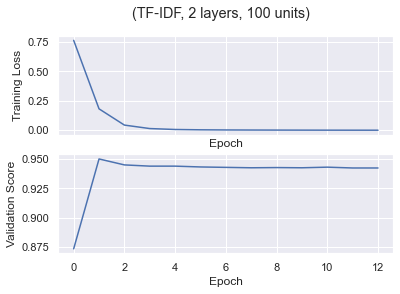

In [98]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('(TF-IDF, 2 layers, 100 units)')

ax1.plot(model1['mlpclassifier'].loss_curve_)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

ax2.plot(model1['mlpclassifier'].validation_scores_)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Score')

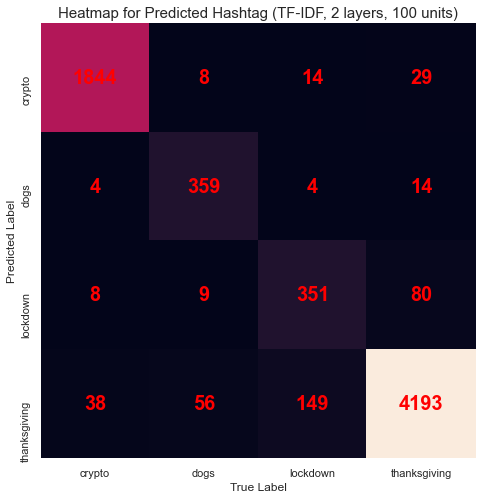

In [61]:
# plot the confusion matrix
mat1 = confusion_matrix(y_val, pred_labels1)
plt.figure(figsize=(8,8))
sns.heatmap(mat1.T, square=True, annot=True, annot_kws={"size": 20, "color": "red", "weight": "bold"}, fmt='d', cbar=False,
           xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Heatmap for Predicted Hashtag (TF-IDF, 2 layers, 100 units)", fontdict={"fontsize":15});

In [62]:
# computing the microaverage and macroaveraged F1 scores for predicted labels on test labels

f1_micro1 = f1_score(y_val, pred_labels1, average = 'micro')
f1_macro1 = f1_score(y_val, pred_labels1, average = 'macro')

print("The microaveraged F1 score using model 1 (TF-IDF, 2 hidden layers, 100 units each) to predict hashtags is", f1_micro1)
print("The macroaveraged F1 score using model 1 (TF-IDF, 2 hidden layers, 100 units each) to predict hashtags is", f1_macro1)


The microaveraged F1 score using model 1 (TF-IDF, 2 hidden layers, 100 units each) to predict hashtags is 0.9423184357541899
The macroaveraged F1 score using model 1 (TF-IDF, 2 hidden layers, 100 units each) to predict hashtags is 0.8853454458584749


### Model with 3 hidden layers (50 units each)

In [63]:
# 3 hidden layers with 50 units each
model2 = make_pipeline(TfidfVectorizer(analyzer = "word", min_df = 0),
                      MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes = (50, 50, 50),
                                    learning_rate_init = 0.001, tol=1e-6, batch_size = 256,
                                    validation_fraction = 0.2, early_stopping = True, verbose = True))

In [64]:
# shuffle the indices of the data before building model
fit2 = model2.fit(x_train, y_train)

Iteration 1, loss = 0.79038012
Validation score: 0.854749
Iteration 2, loss = 0.25145696
Validation score: 0.902933
Iteration 3, loss = 0.08856221
Validation score: 0.938024
Iteration 4, loss = 0.02108478
Validation score: 0.942039
Iteration 5, loss = 0.00664565
Validation score: 0.938897
Iteration 6, loss = 0.00319168
Validation score: 0.939770
Iteration 7, loss = 0.00191843
Validation score: 0.939071
Iteration 8, loss = 0.00121201
Validation score: 0.939595
Iteration 9, loss = 0.00078328
Validation score: 0.939944
Iteration 10, loss = 0.00062346
Validation score: 0.940642
Iteration 11, loss = 0.00051247
Validation score: 0.939944
Iteration 12, loss = 0.00044227
Validation score: 0.939071
Iteration 13, loss = 0.00039580
Validation score: 0.939595
Iteration 14, loss = 0.00035739
Validation score: 0.939420
Iteration 15, loss = 0.00033136
Validation score: 0.939246
Validation score did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.


In [65]:
# use the trained model to predict the labels of the validation set
pred_labels2 = model2.predict(x_val)

Text(0, 0.5, 'Validation Score')

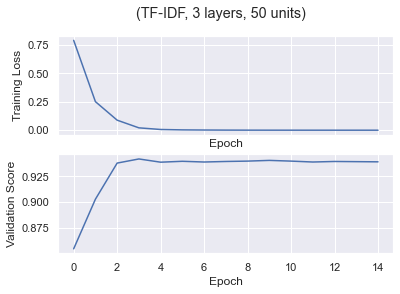

In [66]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('(TF-IDF, 3 layers, 50 units)')

ax1.plot(model2['mlpclassifier'].loss_curve_)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

ax2.plot(model2['mlpclassifier'].validation_scores_)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Score')

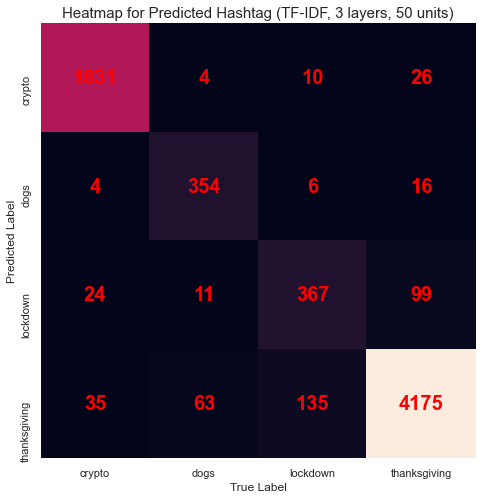

In [67]:
# plot the confusion matrix
mat2 = confusion_matrix(y_val, pred_labels2)
plt.figure(figsize=(8,8))
sns.heatmap(mat2.T, square=True, annot=True, annot_kws={"size": 20, "color": "red", "weight": "bold"}, fmt='d', cbar=False,
           xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Heatmap for Predicted Hashtag (TF-IDF, 3 layers, 50 units)", fontdict={"fontsize":15});

In [68]:
# computing the microaverage and macroaveraged F1 scores for predicted labels on test labels

f1_micro2 = f1_score(y_val, pred_labels2, average = 'micro')
f1_macro2 = f1_score(y_val, pred_labels2, average = 'macro')

print("The microaveraged F1 score using model 2 (TF-IDF, 3 hidden layers, 50 units each) to predict hashtags is", f1_micro2)
print("The macroaveraged F1 score using model 2 (TF-IDF, 3 hidden layers, 50 units each) to predict hashtags is", f1_macro2)


The microaveraged F1 score using model 2 (TF-IDF, 3 hidden layers, 50 units each) to predict hashtags is 0.9395251396648044
The macroaveraged F1 score using model 2 (TF-IDF, 3 hidden layers, 50 units each) to predict hashtags is 0.8805019337271143


## Neural Network (Twitter GloVe Embeddings)

### Pre-processing

In [29]:
# uploading the word embeddings using twitter version of GloVe with 100 dimensions
glove_file = datapath("/Users/rahulmalhotra/Desktop/Statistical Software/Final Project/Glove Twitter/glove.twitter.27B.100d.txt")
word2vec_text_file = get_tmpfile("glove.twitter.27B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_text_file)

(1193514, 100)

In [30]:
# this may take a while to load
embeddings = KeyedVectors.load_word2vec_format(word2vec_text_file)

In [35]:
# wv contains the word vectors/embeddings
wv = embeddings.wv

/Users/rahulmalhotra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [69]:
# initialize an empty dictionary to store out of vocab words and randomly generated embeddings for them
OOV_embed = {}

In [70]:
# function to create a random word embedding of given dimension 
# we will use this to create a random embedding for words that appear in tweets but not in our word embedding
# update current dictionary of OOV words and return the new dictionary with added word
def gen_random_embed(OOV_embed, word, dim):
    # if word is already in this dictionary, don't do anything
    if word in OOV_embed.keys():
        return
    
    # randomly and uniformly generate 100 numbers from (-1,1) to be the word's embedding
    embedding = np.random.uniform(-1, 1, dim)
    
    # add word and embedding as the key,value pair into dictionary
    OOV_embed[word] = embedding

    return OOV_embed
    

In [71]:
# we define the document embedding to be the centroid of the word embeddings for each word in our document
# to get the centroid, we sum up the word embeddings for all words then divide by the number of words

def calc_doc_embedding(doc, embeddings, embed_size, OOV_embed):   
    # store the sum of word embeddings
    word_embed_sum = np.zeros(embed_size)
    
    # CALCULATING CENTROID OF DOCUMENT
    for word in doc:
        # first check our word embeddings
        if word in embeddings.vocab:
            word_embed_sum = word_embed_sum + embeddings[word]
            continue
        # if not in our word embeddings, check if an embedding has already been generated
        else:
            # it has not already been detected as an OOV word, generate and save a random embedding for this word
            if word not in OOV_embed.keys():
                gen_random_embed(OOV_embed, word, embed_size)
            
            word_embed_sum = word_embed_sum + OOV_embed[word]
    
    # divide the total sum by the number of words to get centroid
    doc_embed = word_embed_sum / len(doc)
        
    return doc_embed

In [72]:
# each row represents a document in our training set as a vector of 100 dimension
x_train_embed = np.vstack([calc_doc_embedding(doc, wv, 100, OOV_embed) for doc in x_train])

In [73]:
# each row represents a document in our validation set as a vector of 100 dimension
x_val_embed = np.vstack([calc_doc_embedding(doc, wv, 100, OOV_embed) for doc in x_val])

## Building Models

### Model with 2 hidden layers (100 units each)

In [74]:
# creating a neural network model with 2 hidden layers with 100 units
model1_embed = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes = (100, 100), n_iter_no_change = 100,
                            learning_rate_init = 0.001, verbose = True, validation_fraction = 0.2, batch_size = 256, 
                             tol=1e-7, early_stopping = True)

In [75]:
start = time.time()

# train the model
fit1_embed = model1_embed.fit(x_train_embed, y_train)

end = time.time()

Iteration 1, loss = 0.96805444
Validation score: 0.684183
Iteration 2, loss = 0.82931308
Validation score: 0.732018
Iteration 3, loss = 0.74078809
Validation score: 0.755237
Iteration 4, loss = 0.70425945
Validation score: 0.770950
Iteration 5, loss = 0.69038168
Validation score: 0.774441
Iteration 6, loss = 0.66789620
Validation score: 0.777584
Iteration 7, loss = 0.66108347
Validation score: 0.784043
Iteration 8, loss = 0.66114815
Validation score: 0.780726
Iteration 9, loss = 0.64673246
Validation score: 0.786487
Iteration 10, loss = 0.64407754
Validation score: 0.788408
Iteration 11, loss = 0.63749564
Validation score: 0.780726
Iteration 12, loss = 0.63227206
Validation score: 0.791550
Iteration 13, loss = 0.62757962
Validation score: 0.790154
Iteration 14, loss = 0.62541869
Validation score: 0.794169
Iteration 15, loss = 0.62594919
Validation score: 0.795042
Iteration 16, loss = 0.62067162
Validation score: 0.793994
Iteration 17, loss = 0.61871221
Validation score: 0.799581
Iterat

Iteration 140, loss = 0.49371043
Validation score: 0.807263
Iteration 141, loss = 0.49357652
Validation score: 0.809358
Iteration 142, loss = 0.49137109
Validation score: 0.814246
Iteration 143, loss = 0.48779906
Validation score: 0.813373
Iteration 144, loss = 0.49076202
Validation score: 0.809881
Iteration 145, loss = 0.48745200
Validation score: 0.811453
Iteration 146, loss = 0.48265115
Validation score: 0.814246
Iteration 147, loss = 0.48139839
Validation score: 0.811453
Iteration 148, loss = 0.48613626
Validation score: 0.813373
Iteration 149, loss = 0.48685060
Validation score: 0.810580
Iteration 150, loss = 0.48091838
Validation score: 0.810580
Iteration 151, loss = 0.48495075
Validation score: 0.816166
Iteration 152, loss = 0.48534391
Validation score: 0.812151
Iteration 153, loss = 0.48056918
Validation score: 0.816865
Iteration 154, loss = 0.48005875
Validation score: 0.816865
Iteration 155, loss = 0.48501220
Validation score: 0.809358
Iteration 156, loss = 0.48296952
Validat

/Users/rahulmalhotra/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [76]:
print(end - start)

98.20878577232361


In [77]:
# use the trained model to predict the labels of the validation set
pred_labels1_embed = model1_embed.predict(x_val_embed)

Text(0, 0.5, 'Validation Score')

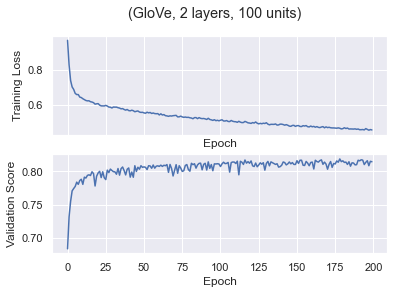

In [78]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('(GloVe, 2 layers, 100 units)')

ax1.plot(model1_embed.loss_curve_)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

ax2.plot(model1_embed.validation_scores_)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Score')

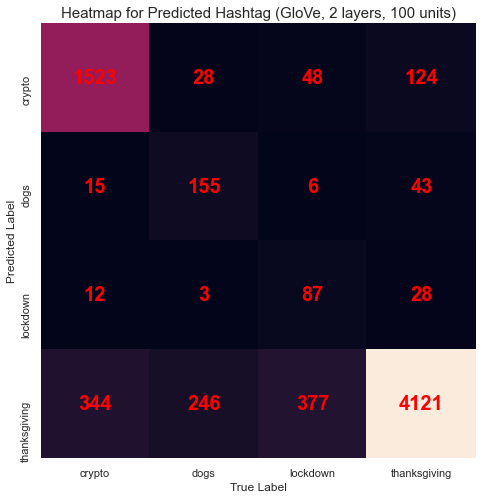

In [79]:
# plot the confusion matrix
mat1_embed = confusion_matrix(y_val, pred_labels1_embed)
plt.figure(figsize=(8,8))
sns.heatmap(mat1_embed.T, square=True, annot=True, annot_kws={"size": 20, "color": "red", "weight": "bold"}, fmt='d', cbar=False,
           xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Heatmap for Predicted Hashtag (GloVe, 2 layers, 100 units)", fontdict={"fontsize":15});

In [80]:
# computing the microaverage and macroaveraged F1 scores for predicted labels on test labels

f1_micro1_embed = f1_score(y_val, pred_labels1_embed, average = 'micro')
f1_macro1_embed = f1_score(y_val, pred_labels1_embed, average = 'macro')

print("The microaveraged F1 score using model 3 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is", f1_micro1_embed)
print("The macroaveraged F1 score using model 3 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is", f1_macro1_embed)


The microaveraged F1 score using model 3 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is 0.8220670391061452
The macroaveraged F1 score using model 3 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is 0.6158197298854288


### Model with 3 hidden layers (50 units each)

In [81]:
# creating a neural network model with 3 hidden layers with 50 units
model2_embed = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes = (50, 50, 50), n_iter_no_change = 100,
                            learning_rate_init = 0.001, verbose = True, validation_fraction = 0.2, batch_size = 256,
                              tol=1e-7,early_stopping = True)

In [82]:
# train the model
fit2_embed = model2_embed.fit(x_train_embed, y_train)

Iteration 1, loss = 1.04776452
Validation score: 0.615398
Iteration 2, loss = 0.93208430
Validation score: 0.704085
Iteration 3, loss = 0.80193453
Validation score: 0.749476
Iteration 4, loss = 0.73178808
Validation score: 0.768156
Iteration 5, loss = 0.70551915
Validation score: 0.766934
Iteration 6, loss = 0.69208227
Validation score: 0.776362
Iteration 7, loss = 0.68426548
Validation score: 0.780028
Iteration 8, loss = 0.67028766
Validation score: 0.780028
Iteration 9, loss = 0.66676182
Validation score: 0.786837
Iteration 10, loss = 0.66213572
Validation score: 0.783170
Iteration 11, loss = 0.65337469
Validation score: 0.783170
Iteration 12, loss = 0.65119362
Validation score: 0.787011
Iteration 13, loss = 0.64713332
Validation score: 0.790503
Iteration 14, loss = 0.64256919
Validation score: 0.785615
Iteration 15, loss = 0.63925330
Validation score: 0.789630
Iteration 16, loss = 0.63613821
Validation score: 0.771124
Iteration 17, loss = 0.63165011
Validation score: 0.780552
Iterat

Iteration 140, loss = 0.51790437
Validation score: 0.813897
Iteration 141, loss = 0.51411205
Validation score: 0.812849
Iteration 142, loss = 0.51687714
Validation score: 0.813722
Iteration 143, loss = 0.51516074
Validation score: 0.817563
Iteration 144, loss = 0.51294937
Validation score: 0.816515
Iteration 145, loss = 0.51293346
Validation score: 0.812151
Iteration 146, loss = 0.51292197
Validation score: 0.816341
Iteration 147, loss = 0.51298531
Validation score: 0.810580
Iteration 148, loss = 0.51066424
Validation score: 0.815817
Iteration 149, loss = 0.51197609
Validation score: 0.812500
Iteration 150, loss = 0.51448923
Validation score: 0.813198
Iteration 151, loss = 0.50992136
Validation score: 0.818785
Iteration 152, loss = 0.51417185
Validation score: 0.817039
Iteration 153, loss = 0.50603462
Validation score: 0.814246
Iteration 154, loss = 0.50777872
Validation score: 0.814246
Iteration 155, loss = 0.50951900
Validation score: 0.816341
Iteration 156, loss = 0.51115749
Validat

/Users/rahulmalhotra/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [84]:
# use the trained model to predict the labels of the validation set
pred_labels2_embed = model2_embed.predict(x_val_embed)

Text(0, 0.5, 'Validation Score')

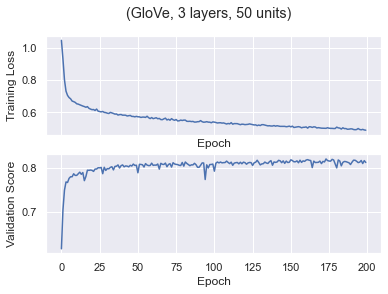

In [85]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('(GloVe, 3 layers, 50 units)')

ax1.plot(model2_embed.loss_curve_)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

ax2.plot(model2_embed.validation_scores_)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Score')

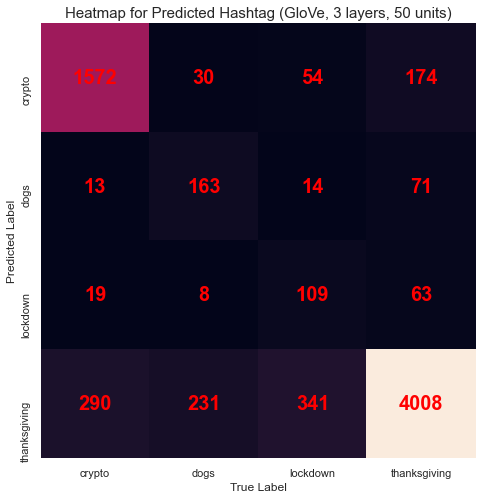

In [86]:
# plot the confusion matrix
mat2_embed = confusion_matrix(y_val, pred_labels2_embed)
plt.figure(figsize=(8,8))
sns.heatmap(mat2_embed.T, square=True, annot=True, annot_kws={"size": 20, "color": "red", "weight": "bold"}, fmt='d', cbar=False,
           xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Heatmap for Predicted Hashtag (GloVe, 3 layers, 50 units)", fontdict={"fontsize":15});

In [87]:
# computing the microaverage and macroaveraged F1 scores for predicted labels on test labels

f1_micro2_embed = f1_score(y_val, pred_labels2_embed, average = 'micro')
f1_macro2_embed = f1_score(y_val, pred_labels2_embed, average = 'macro')

print("The microaveraged F1 score using model 4 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is", f1_micro2_embed)
print("The macroaveraged F1 score using model 4 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is", f1_macro2_embed)


The microaveraged F1 score using model 4 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is 0.8173184357541899
The macroaveraged F1 score using model 4 (GloVe, 3 hidden layers, 50 units each) to predict hashtags is 0.6228372145463636


## Table of F1 Scores

In [88]:
models = ['Logistic', 'Naive Bayes', 'TF-IDF, 2 layers, 100 units', 'TF-IDF, 3 layers, 50 units', 'GloVe, 2 layers, 100 units', 'GloVe, 3 layers, 50 units']
all_micro_scores = [f1_micro_logistic, f1_micro_naive, f1_micro1, f1_micro2, f1_micro1_embed, f1_micro2_embed]
all_micro_scores = ['{:.6f}'.format(score) for score in all_micro_scores]
all_macro_scores = [f1_macro_logistic, f1_macro_naive, f1_macro1, f1_macro2, f1_macro1_embed, f1_macro2_embed]
all_macro_scores = ['{:.6f}'.format(score) for score in all_macro_scores]

In [89]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'Micro F1 Scores', 'Macro F1 Scores']),
                 cells=dict(values=[models, all_micro_scores, all_macro_scores]))
                     ])
fig.show()

# Using our best model (TF-IDF, 2 layers, 100 units) on our test set

In [90]:
start = time.time()

EPOCHS = 15
training_score = []
validation_score = []
test_score = []

model = make_pipeline(TfidfVectorizer(analyzer = "word", min_df = 0),
                      MLPClassifier(random_state=1, max_iter=1, hidden_layer_sizes = (100, 100),
                                    tol=1e-6,learning_rate_init = 0.001, verbose = False,
                                    batch_size = 256, warm_start = True))

for i in range(1, EPOCHS+1):
    fit = model.fit(x_train, y_train)
        
    training_score.append(model.score(x_train, y_train))
    validation_score.append(model.score(x_val, y_val))
    test_score.append(model.score(x_test, y_test))

pred_labels = model.predict(x_test)

end = time.time()
print(end - start)

/Users/rahulmalhotra/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.



296.1354880332947


Text(0, 0.5, 'Training Loss')

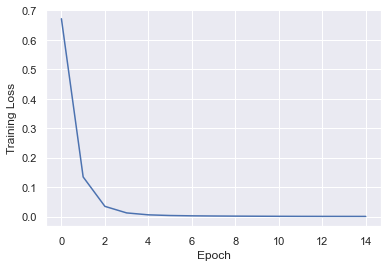

In [99]:
# plotting training loss
plt.plot(model['mlpclassifier'].loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')


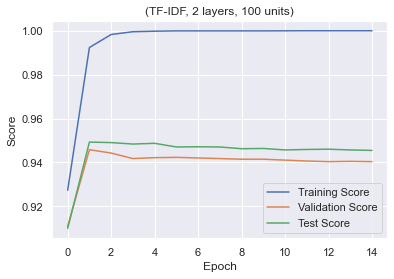

In [93]:
# plotting training score vs test score
plt.plot(training_score, label = 'Training Score')
plt.plot(validation_score, label = 'Validation Score')
plt.plot(test_score, label = 'Test Score')
plt.title('(TF-IDF, 2 layers, 100 units)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

In [94]:
# use the trained model to predict the labels of the test set
pred_labels = model.predict(x_test)

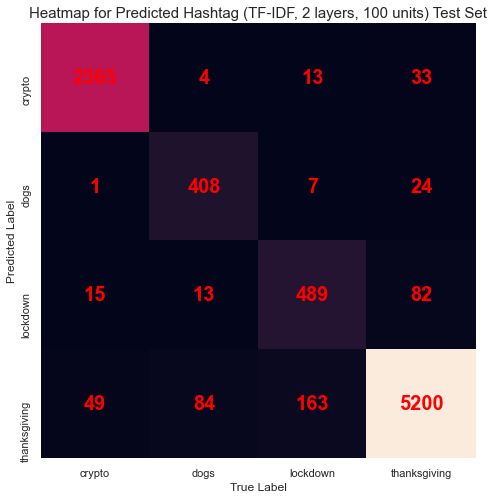

In [95]:
# plot the confusion matrix
mat = confusion_matrix(y_test, pred_labels)
plt.figure(figsize=(8,8))
sns.heatmap(mat.T, square=True, annot=True, annot_kws={"size": 20, "color": "red", "weight": "bold"}, fmt='d', cbar=False,
           xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title("Heatmap for Predicted Hashtag (TF-IDF, 2 layers, 100 units) Test Set", fontdict={"fontsize":15});

In [96]:
# computing the microaverage and macroaveraged F1 scores for predicted labels on test labels
f1_micro = f1_score(y_test, pred_labels, average = 'micro')
f1_macro = f1_score(y_test, pred_labels, average = 'macro')

print("Test Set Micro F1 Score:", f1_micro)
print("Test Set Macro F1 Score:", f1_macro)

Test Set Micro F1 Score: 0.9454748603351956
Test Set Macro F1 Score: 0.8913604631517256
